<a href="https://colab.research.google.com/github/rohit-LIGO/McGill/blob/svn---rohit-LIGO-rohit_nair17004-ls-https%2Fanag-repo.lbl.gov%2Fsvn%2Ftestrepo/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.2 MB 42 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.1-py2.py3-none-any.whl size=177276478 sha256=dcf466877c982478162aff7379140527b18e7c83a5323c0d583c45591aa03984
  Stored in directory: /root/.cache/pip/wheels/a1/a1/d9/bb37df368c4635a707e7362d1088450b606041f05aeba5f173
Successfully built h2o


In [66]:
import h2o
h2o.init(max_mem_size = 2)           
h2o.remove_all()
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 21 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_unknownUser_3l56oe
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.826 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [67]:
higgs = h2o.import_file('higgs.csv.gz')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [70]:
higgs.drop(['KaggleSet', 'KaggleWeight'], axis=1)

EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
100000,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.00081448,s
100001,160.937,68.768,103.235,48.146,-999,-999,-999,3.473,2.078,125.157,0.879,1.414,-999,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999,-999,-999,46.226,0.681042,b
100002,-999,162.172,125.953,35.635,-999,-999,-999,3.148,9.336,197.814,3.776,1.414,-999,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999,-999,-999,44.251,0.715742,b
100003,143.905,81.417,80.943,0.414,-999,-999,-999,3.31,0.414,75.968,2.354,-1.285,-999,22.647,-1.655,0.01,53.321,-0.522,-3.1,31.082,0.06,86.062,0,-999,-999,-999,-999,-999,-999,0,1.66065,b
100004,175.864,16.915,134.805,16.405,-999,-999,-999,3.891,16.405,57.983,1.056,-1.385,-999,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999,-999,-999,-999,-999,-999,0,1.90426,b
100005,89.744,13.55,59.149,116.344,2.636,284.584,-0.54,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.66,0.0254338,b
100006,148.754,28.862,107.782,106.13,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.85,1.113,2.409,97.24,0.675,-0.966,38.421,-1.443,294.074,2,123.01,0.864,1.45,56.867,0.131,-2.767,179.877,0.00081448,s
100007,154.916,10.418,94.714,29.169,-999,-999,-999,2.897,1.526,138.178,0.365,-1.305,-999,78.8,0.654,1.547,28.74,0.506,-1.347,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,-999,-999,-999,30.638,0.00572068,s
100008,105.594,50.559,100.989,4.288,-999,-999,-999,2.904,4.288,65.333,0.675,-1.366,-999,39.008,2.433,-2.532,26.325,0.21,1.884,37.791,0.024,129.804,0,-999,-999,-999,-999,-999,-999,0,1.6148,b
100009,128.053,88.941,69.272,193.392,-999,-999,-999,1.609,28.859,255.123,0.599,0.538,-999,54.646,-1.533,0.416,32.742,-0.317,-0.636,132.678,0.845,294.741,1,167.735,-2.767,-2.514,-999,-999,-999,167.735,0.000461025,s


In [71]:
higgs_df = higgs.as_data_frame(use_pandas=True)


In [72]:
higgs_df['Label'].value_counts()

b    538678
s    279560
Name: Label, dtype: int64

In [76]:
higgs1=higgs.drop(['KaggleSet', 'KaggleWeight'], axis=1)
higgs1.describe()

Rows:818238
Cols:33

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,real,real,real,real,real,real,real,enum
mins,100000.0,-999.0,0.0,6.329,0.0,-999.0,-999.0,-999.0,0.208,0.0,46.103,0.047,-1.414,-999.0,20.0,-2.499,-3.142,26.0,-2.508,-3.142,0.051,-3.142,13.678,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.000461025356734,
mean,509118.5,-48.819018731713555,49.252714088077305,81.14056096148049,57.84952417389545,-707.7408799713579,-600.1911911399866,-708.681306407184,2.373871382165085,18.969617243393756,158.59615892808674,1.4387755445237256,-0.127277217631056,-708.3069176119914,38.69815220632642,-0.011662892703589866,-0.013158134919180017,46.6924138062519,-0.019079470765229763,0.0494604088297048,41.65452646418282,-0.008634276335247253,209.9087302545229,0.9799227119737747,-348.7578397947798,-399.6932941332482,-399.7038575573371,-691.6261113233539,-708.4422064643796,-708.4433118872508,73.2055937832271,0.503144361334385,
maxs,918237.0,1949.261,968.669,1349.351,2834.999,8.724,4974.979,17.65,5.751,2834.999,2079.162,32.228,1.414,1.0,764.408,2.5,3.142,701.328,2.506,3.142,2842.617,3.142,2190.275,3.0,1163.439,4.5,3.142,817.801,4.5,3.142,1860.175,2.38631583084,
sigma,236205.1091181137,406.11839738380405,35.378608835957074,40.58270776635657,63.41193842824419,454.7938994985362,658.7240401916804,453.32859921032775,0.7808753293094252,21.918490754824987,116.0898094920282,0.8451093113398227,1.1942348304383956,453.9091274797473,22.429016375347217,1.2135113109297002,1.8160831510749702,22.14233687142169,1.2642503720169442,1.8150987187944545,32.49611304941336,1.8127031279122563,126.81668590410617,0.9787929270183173,533.0970063549731,489.42856044473183,489.42001299922265,480.27474424935525,453.6991500398255,453.69715797651935,98.33175414048536,0.5721997727051731,
zeros,0,0,9,0,124,38,0,187,0,122,0,0,171,51537,0,0,116,0,120,117,0,136,0,327371,0,92,79,0,49,36,327371,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,100000.0,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2.0,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.00081448039868,s
1,100001.0,160.937,68.768,103.235,48.146,-999.0,-999.0,-999.0,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1.0,46.226,0.725,1.158,-999.0,-999.0,-999.0,46.226,0.681041906806,b
2,100002.0,-999.0,162.172,125.953,35.635,-999.0,-999.0,-999.0,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.0,-999.0,-999.0,44.251,0.715742006349,b


In [77]:
train, valid, test = higgs1.split_frame([0.6, 0.2], seed = 2019)
higgs1_X = higgs1.col_names[1: -1]
higgs1_y = higgs1.col_names[-1]

In [81]:
higgs1_model_v1 = H2ODeepLearningEstimator(model_id = 'higgs_v1', epochs = 10, variable_importances = True)
higgs1_model_v1.train(higgs1_X, higgs1_y, training_frame = train, validation_frame = valid)
print(higgs1_model_v1)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator : Deep Learning
Model Key: higgs_v1


Status of Neuron Layers: predicting Label, 2-class classification, bernoulli distribution, CrossEntropy loss, 47,002 weights/biases, 565.3 KB, 4,921,203 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate            rate_rms             momentum    mean_weight             weight_rms           mean_bias               bias_rms
--  -------  -------  ---------  ---------  ----  ----  -------------------  -------------------  ----------  ----------------------  -------------------  ----------------------  ------------------
    1        31       Input      0.0
    2        200      Rectifier  0.0        0.0   0.0   0.08496921015327115  0.24805235862731934  0.0         -0.0015193760502223732  0.20190173387527466  -0.0067464652807653295  0.5505027770996094
    3        200  

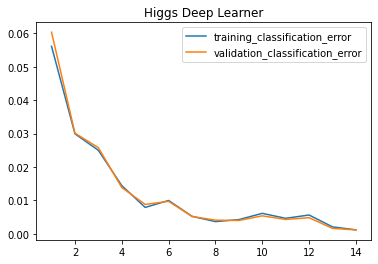

In [82]:
higgs1_v1_df = higgs1_model_v1.score_history()
plt.plot(higgs1_v1_df['training_classification_error'], label="training_classification_error")
plt.plot(higgs1_v1_df['validation_classification_error'], label="validation_classification_error")
plt.title("Higgs Deep Learner")
plt.legend();

In [83]:
pred = higgs1_model_v1.predict(test[1:-1]).as_data_frame(use_pandas=True)
test_actual = test.as_data_frame(use_pandas=True)['Label']
(test_actual == pred['predict']).mean()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


0.9986963307525171

In [90]:
higgs1_model_v2 = H2ODeepLearningEstimator(model_id = 'higgs_v2', hidden = [32, 32, 32], epochs = 1000000, score_validation_samples = 10000, stopping_rounds = 2, stopping_metric = 'misclassification', 
stopping_tolerance = 0.01)
higgs1_model_v2.train(higgs1_X, higgs1_y, training_frame = train, validation_frame = valid)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: higgs_v2


Status of Neuron Layers: predicting Label, 2-class classification, bernoulli distribution, CrossEntropy loss, 3,202 weights/biases, 49.0 KB, 4,547,232 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate            rate_rms             momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ---------  ---------  ----  ----  -------------------  -------------------  ----------  ---------------------  -------------------  -------------------  -------------------
    1        31       Input      0.0
    2        32       Rectifier  0.0        0.0   0.0   0.07615747999881434  0.2440057396888733   0.0         -0.010466801688454002  0.24815338850021362  0.1818896761047445   0.62921142578125
    3        32       Rectifier  0.0        0.0   0.0   0.2692993353338142   0.43011045455932617  0.0         -0.07310550618301193   0.2464504837989807   0.7830757459053905   0.3911552429199219
    4        32       Rectifier  0.0        0.0   0.0   0.15311804139486185  0.3399437665939331   0.0         -0.050307838668459226  0.42286741733551025  0.11434989506990519  0.5668613910675049
    5        2        Softmax               0.0   0.0   0.11806812502163666  0.14867597818374634  0.0         -0.19687787553993985   1.7770113945007324   2.8639236792256533   0.18528002500534058

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0026602309648538027
RMSE: 0.0515774268925254
LogLoss: 0.014847284370381499
Mean Per-Class Error: 0.002109385411450022
AUC: 0.999767763420681
AUCPR: 0.9997097875391714
Gini: 0.9995355268413619

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9421742592180751
       b     s     Error    Rate
-----  ----  ----  -------  -------------
b      6520  12    0.0018   (12.0/6532.0)
s      8     3351  0.0024   (8.0/3359.0)
Total  6528  3363  0.002    (20.0/9891.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.942174     0.997025  146
max f2                       0.618014     0.997799  159
max f0point5                 0.978538     0.9972    140
max accuracy                 0.978538     0.997978  140
max precision                1            1         0
max recall                   1.00537e-08  1         399
max specificity              1            1         0
max absolute_mcc             0.942174     0.995494  146
max min_per_class_accuracy   0.942174     0.997618  146
max mean_per_class_accuracy  0.942174     0.997891  146
max tns                      1            6532      0
max fns                      1            2582      0
max fps                      1.00537e-08  6532      399
max tps                      1.00537e-08  3359      399
max tnr                      1            1         0
max fnr                      1            0.768681  0
max fpr                      1.00537e-08  1         399
max tpr                      1.00537e-08  1         399

Gains/Lift Table: Avg response rate: 33.96 %, avg score: 34.24 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score         cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ------------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100091                   1                  2.94463     2.94463            1                1             1                           1                   0.0294731       0.0294731                  194.463   194.463         

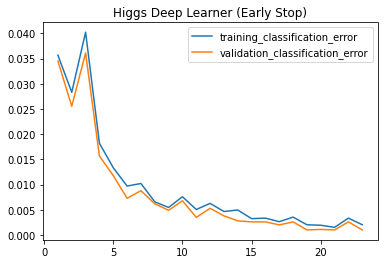

In [93]:
higgs1_v2_df = higgs1_model_v2.score_history()
plt.plot(higgs1_v2_df['training_classification_error'], label="training_classification_error")
plt.plot(higgs1_v2_df['validation_classification_error'], label="validation_classification_error")
plt.title("Higgs Deep Learner (Early Stop)")
plt.legend();

In [92]:
pred = higgs1_model_v2.predict(test[1:-1]).as_data_frame(use_pandas=True)
test_actual = test.as_data_frame(use_pandas=True)['Label']
(test_actual == pred['predict']).mean()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


0.9984821128010527

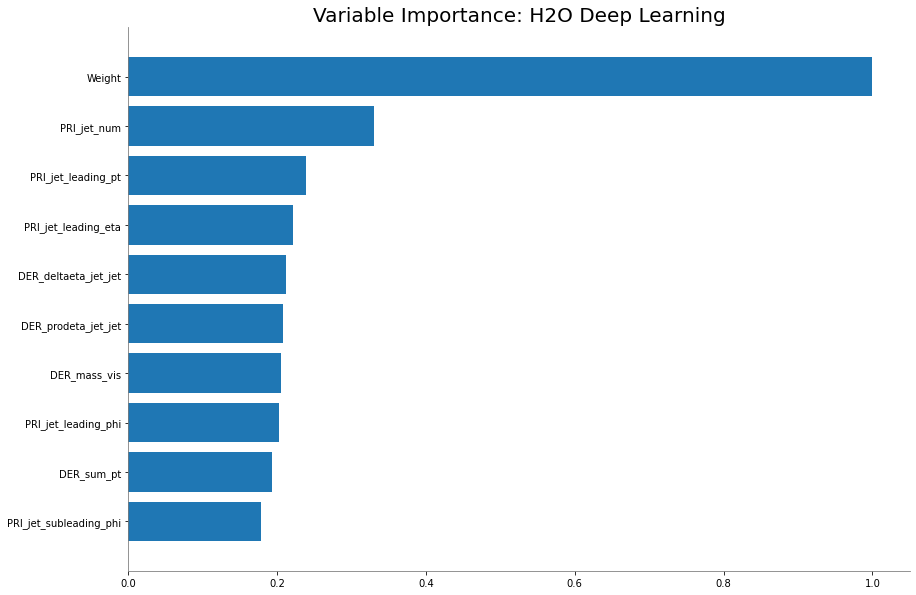

<Figure size 432x288 with 0 Axes>

In [94]:
higgs1_model_v2.varimp_plot();